### Diabetes

#### Overview:
Diabetes is the disease that occurs when the amount of glucose or blood sugar get's too high.
<h4 style="color:red">Glucose is the main source of body's energy.</h4>  
<h4 style="color:red">Insulin is the harmone made by pancreas helps glucose from our food get into our cells to be used for energy.</h4>  

#### Type I Diabetes
<ul>
    <li>In this type of diabetes body makes little or no insulin.</li>
    <li>Immune system attacks and destroy cells in pancreas that make insulin.</li>
    <li>Majorly diagnosed in children and young adults.</li>
</ul>

#### Type II Diabetes
<ul>
    <li>In this type of diabetes body do not use insulin properly.</li>
    <li>These type of diabetes developed by overweight or family history of disease risk factors.</li>
    <li>Diagnosed at any age.</li>
</ul>

#### About Dataset
The Diabetes prediction dataset is a collection of medical and demographic data from patients, along with their diabetes status (positive or negative). The data includes features such as age, gender, body mass index (BMI), hypertension, heart disease, smoking history, HbA1c level, and blood glucose level. This dataset can be used to build machine learning models to predict diabetes in patients based on their medical history and demographic information. This can be useful for healthcare professionals in identifying patients who may be at risk of developing diabetes and in developing personalized treatment plans. Additionally, the dataset can be used by researchers to explore the relationships between various medical and demographic factors and the likelihood of developing diabetes.

#### Import required libraries

In [1]:
#pandas
import pandas as pd 

#numpy
import numpy as np

#math
from math import ceil

#matplotlib
import matplotlib.pyplot as plt

#seaborn
import seaborn as sns

#sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

#### Load data

In [2]:
data = pd.read_csv('diabetes_prediction_dataset.csv')

#### Data type of columns

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


**Diabetes is the target variable being predicted, with values of 1 indicating the presence of diabetes and 0 indicating the**

In [4]:
data.shape

(100000, 9)

**Dataset contains 1L records and 9 columns.**

#### Check for NULL values

In [5]:
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

**We don't have any null values**

In [6]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


#### EDA

**Gender Feature**

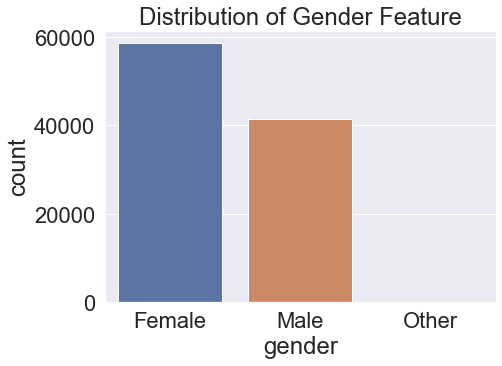

In [7]:
plt.figure(figsize=(7,5))
sns.set(font_scale=2)
sns.countplot(x='gender',data=data);
plt.title("Distribution of Gender Feature");

In [8]:
data.gender.value_counts()

Female    58552
Male      41430
Other        18
Name: gender, dtype: int64

**There are 58552 female records, 41430 male records, and 18 other gender records in the dataset.**

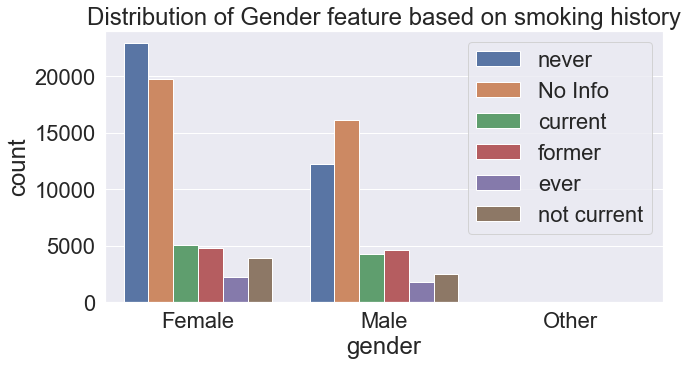

In [9]:
plt.figure(figsize=(10,5));
sns.set(font_scale=2)
sns.countplot(x='gender',data=data,hue='smoking_history');
plt.legend(loc="upper right");
plt.title("Distribution of Gender feature based on smoking history");

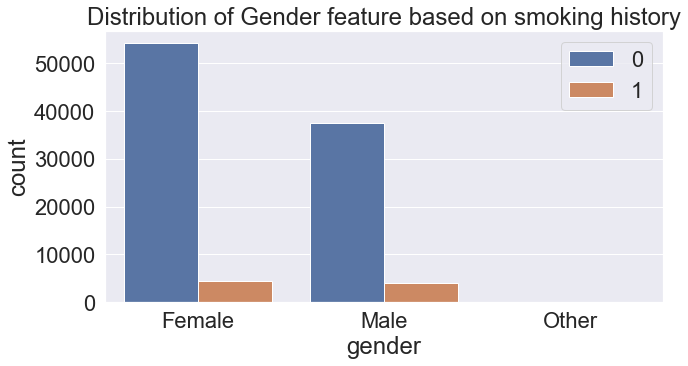

In [10]:
plt.figure(figsize=(10,5));
sns.countplot(x='gender',data=data,hue='diabetes');
plt.legend(loc="upper right");
plt.title("Distribution of Gender feature based on smoking history");

In [11]:
# Filter the data where 'diabetes' is 1
diabetes_data = data[data['diabetes'] == 1]

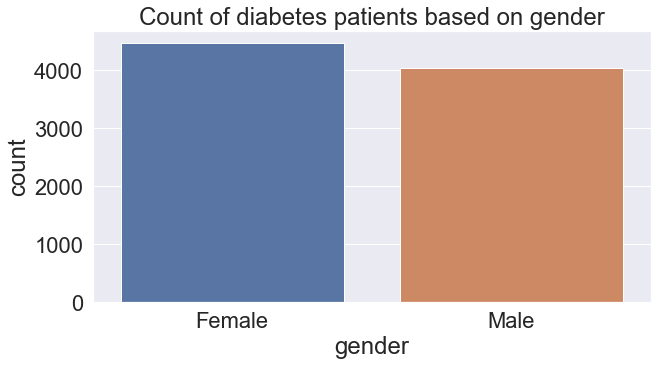

In [12]:
plt.figure(figsize=(10,5));
sns.countplot(x='gender', data=diabetes_data)
plt.title("Count of diabetes patients based on gender");

**According to the graph above, the number of female diabetes patients are more as compared to male patients.**

**Age Feature**

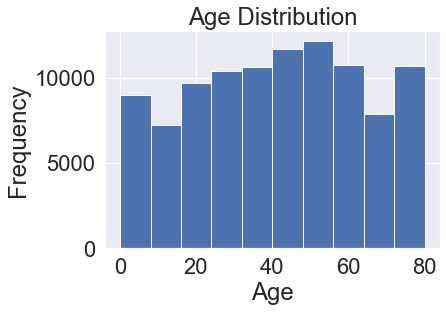

In [13]:
plt.hist(data['age']);
# Set the plot title and labels
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Display the plot
plt.show()

**Hypertension Feature**

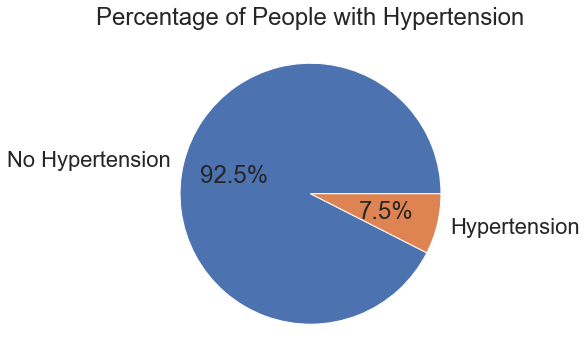

In [14]:
# Count the number of occurrences of hypertension values
hypertension_counts = data['hypertension'].value_counts()

# Calculate the percentage of people with hypertension
hypertension_percentage = hypertension_counts / len(data) * 100

# Create a pie chart
plt.figure(figsize=(10,6))
labels = ['No Hypertension', 'Hypertension']
plt.pie(hypertension_percentage, labels=labels, autopct='%1.1f%%')

# Set the plot title
plt.title('Percentage of People with Hypertension')

# Display the plot
plt.show()

**Heart Disease Feature**

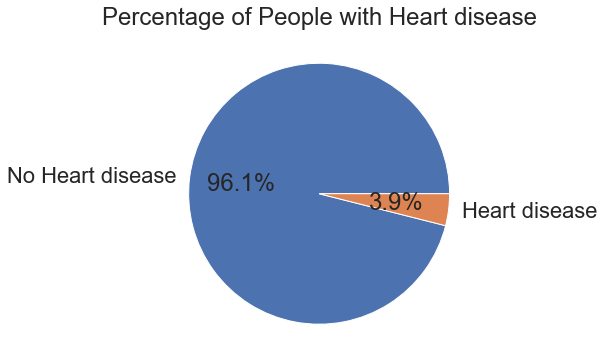

In [15]:
heart_disease_counts = data['heart_disease'].value_counts()

# Calculate the percentage of people with heart disease
heart_disease_percentage = heart_disease_counts / len(data) * 100

# Create a pie chart
plt.figure(figsize=(10,6))
labels = ['No Heart disease', 'Heart disease']
plt.pie(heart_disease_percentage, labels=labels, autopct='%1.1f%%')

plt.title('Percentage of People with Heart disease')

plt.show()

**Smoking Histroy Feature**

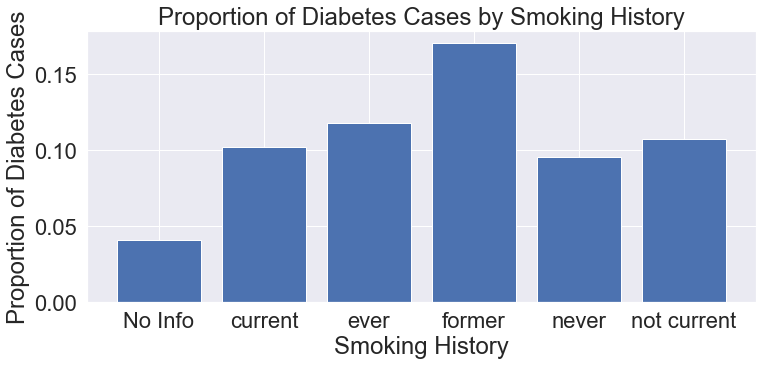

In [16]:
grouped_data = data.groupby('smoking_history')['diabetes'].mean()

# Create a bar plot
plt.figure(figsize=(12,5))
plt.bar(grouped_data.index, grouped_data.values)

# Set the plot title and labels
plt.title('Proportion of Diabetes Cases by Smoking History')
plt.xlabel('Smoking History')
plt.ylabel('Proportion of Diabetes Cases')

# Display the plot
plt.show()

#### Split Data

In [17]:
X = data.drop('diabetes',axis=1)
y = data.diabetes

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=43)

In [19]:
X_train.shape,X_test.shape

((70000, 8), (30000, 8))

#### Data Encoding

In [20]:
def encode_gender(label):
    if label == 'Female':
        return 0
    elif label == 'Male':
        return 1
    else:
        return 2

In [21]:
X_train.gender = X_train.gender.apply(encode_gender)
X_test.gender = X_test.gender.apply(encode_gender)

In [22]:
def encoder_smoking(label):
    if label == 'No Info':
        return 0
    elif label == 'never':
        return 1
    elif label == 'former':
        return 2
    elif label == 'current':
        return 3
    elif label == 'not current':
        return 4
    else:
        return 5

In [23]:
X_train['smoking_history'] = X_train['smoking_history'].apply(encoder_smoking)
X_test['smoking_history'] = X_test['smoking_history'].apply(encoder_smoking)

In [24]:
X_train.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
61308,1,65.0,0,1,0,27.32,4.5,140
14140,0,54.0,0,0,0,27.32,5.8,126
12343,1,47.0,0,0,1,23.19,3.5,145
98870,0,5.0,0,0,0,21.65,4.0,140
94108,0,54.0,0,0,0,53.72,4.8,126


#### Feature selection

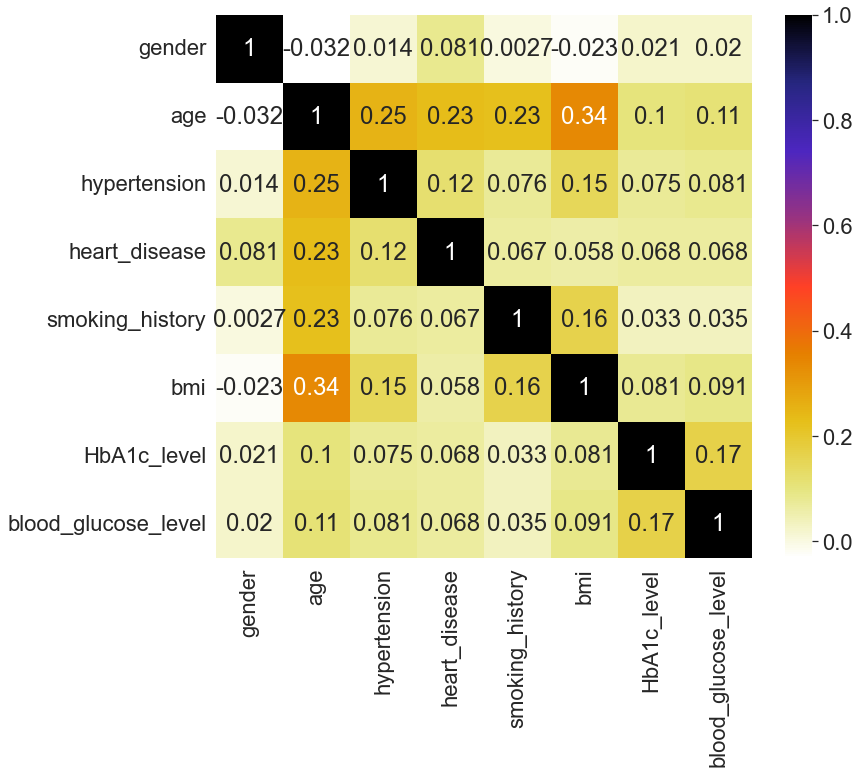

In [25]:
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.CMRmap_r);
plt.show();

**From heatmap we can conclude that no feature is highly correlated to each other.**

In [26]:
from sklearn.feature_selection import VarianceThreshold
var_thres = VarianceThreshold(threshold=0)
var_thres.fit(X_train)

VarianceThreshold(threshold=0)

In [27]:
const_cols = [column for column in X_train.columns if column not in X_train.columns[var_thres.get_support()]]

In [28]:
const_cols

[]

**After using VarianceThreshold on training dataset we can say that there is no feature with low variance.**

#### Handle Imbalance Data

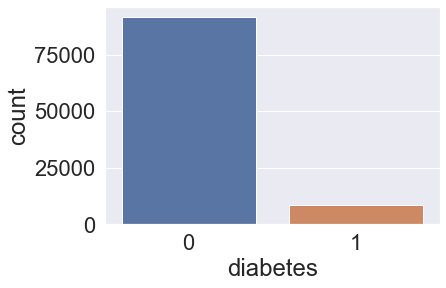

In [29]:
sns.countplot(x='diabetes',data=data);

**According to the above count plot, our dataset is imbalanced.**<br>
<h4 style='color:red'>What is Imbalanced dataset?<h4>
one class or category has a much larger number of instances than the other class in the dataset.

In [30]:
from imblearn.over_sampling import SMOTE
oversampler = SMOTE()
X_over, y_over = oversampler.fit_resample(X_train, y_train)

**SMOTE (Synthetic Minority Over-sampling Technique) is a popular oversampling technique used to address class imbalance in a dataset.**<br>
**SMOTE helps to address the issue of class imbalance by increasing the number of instances in the minority class.**

In [31]:
X_over.shape,y_over.shape

((128204, 8), (128204,))

In [32]:
scalar = StandardScaler()

In [33]:
# Fit the scaler on the training data and transform both training and testing data
X_over_scaled = scalar.fit_transform(X_over)
X_test_scaled = scalar.transform(X_test)

#### Model Training

In [34]:
model_names = []
accuracies = []

<h4 style='color:blue'>Logistic Regression</h4>

In [35]:
log_reg = LogisticRegression(max_iter=2000)
log_reg.fit(X_over_scaled,y_over)
model_names.append('Logistic Regression')
accuracies.append(ceil(log_reg.score(X_test_scaled,y_test)*100))
y_pred = log_reg.predict(X_test_scaled)
print(classification_report(y_test,y_pred))

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cfmlr=confusion_matrix(y_test,y_pred)
print("Confusion matrix by Log Reg:")
print(cfmlr)
#class_rlr=classification_report(y_test,y_pred)
#print("Classfication rep by Log reg:")
#print(class_rlr)
#acc_slr=accuracy_score(y_test,y_pred)
#print("Accuracy score by Log reg:",acc_slr)

              precision    recall  f1-score   support

           0       0.98      0.89      0.93     27398
           1       0.42      0.86      0.56      2602

    accuracy                           0.88     30000
   macro avg       0.70      0.87      0.75     30000
weighted avg       0.94      0.88      0.90     30000

Confusion matrix by Log Reg:
[[24287  3111]
 [  372  2230]]


<h4 style='color:blue'>k nearest neighbour</h4>

In [36]:
accuracy_rate = []
for i in range(1,16,2):
    knn = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(knn,X_over_scaled,y_over,cv=3)
    accuracy_rate.append(score.mean())

**Choosing K value**

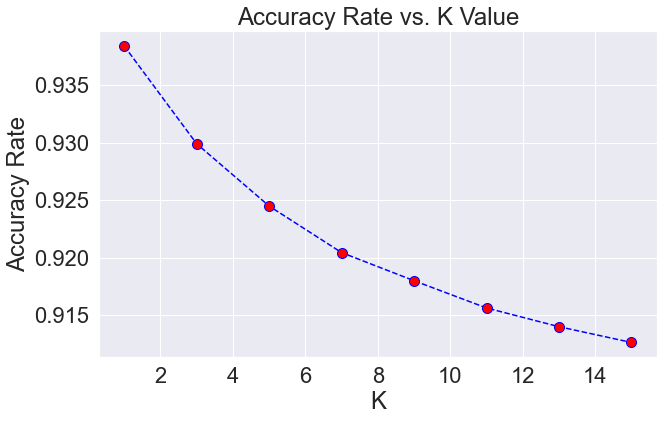

In [37]:
plt.figure(figsize=(10,6))
plt.plot(range(1,16,2),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K');
plt.ylabel('Accuracy Rate');

In [38]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_over_scaled,y_over)
model_names.append('KNeighborsClassifier')
accuracies.append(ceil(knn.score(X_test_scaled,y_test)*100))
y_pred = knn.predict(X_test_scaled)
print(classification_report(y_test,y_pred))
cfmlr=confusion_matrix(y_test,y_pred)
print("Confusion matrix by Log Reg:")
print(cfmlr)

              precision    recall  f1-score   support

           0       0.97      0.95      0.96     27398
           1       0.60      0.72      0.66      2602

    accuracy                           0.93     30000
   macro avg       0.79      0.84      0.81     30000
weighted avg       0.94      0.93      0.94     30000

Confusion matrix by Log Reg:
[[26144  1254]
 [  724  1878]]


<h4 style='color:blue'>Decision tree</h4>

**Decision tree pre-pruning**

In [39]:
parameter = {
    'criterion':["gini", "entropy", "log_loss"],
    'splitter' :["best", "random"],
    'max_depth':[1,2,3,4,5],
    'max_features':["auto", "sqrt", "log2"],
    'ccp_alpha':[1,2,3,4,5,6,7]
}

In [40]:
treemodel = DecisionTreeClassifier(max_depth=2)
cv = GridSearchCV(treemodel,param_grid=parameter,cv=5,scoring='accuracy')

In [41]:
cv.fit(X_over_scaled,y_over)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(max_depth=2),
             param_grid={'ccp_alpha': [1, 2, 3, 4, 5, 6, 7],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [42]:
cv.best_params_

{'ccp_alpha': 1,
 'criterion': 'gini',
 'max_depth': 1,
 'max_features': 'auto',
 'splitter': 'best'}

In [43]:
y_pred = cv.predict(X_test_scaled)

In [44]:
model_names.append('Decision Tree')
accuracies.append(ceil(cv.score(X_test_scaled,y_test)*100))

In [45]:
print(classification_report(y_test,y_pred))
cfmlr=confusion_matrix(y_test,y_pred)
print("Confusion matrix by Log Reg:")
print(cfmlr)

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     27398
           1       0.00      0.00      0.00      2602

    accuracy                           0.91     30000
   macro avg       0.46      0.50      0.48     30000
weighted avg       0.83      0.91      0.87     30000

Confusion matrix by Log Reg:
[[27398     0]
 [ 2602     0]]


#### Models used and their accuracy

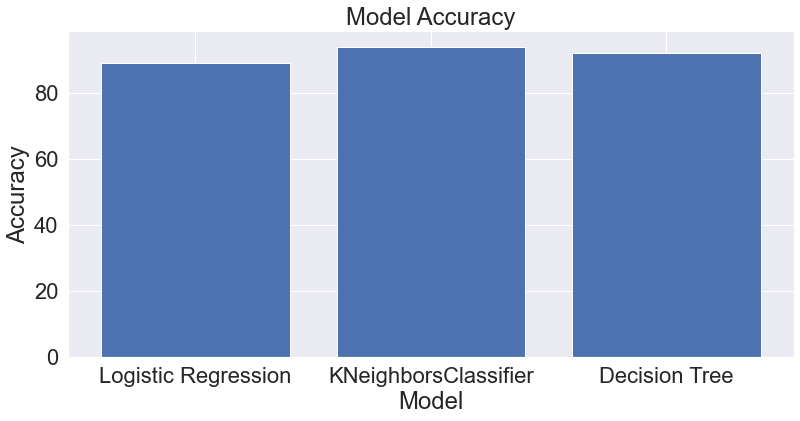

In [46]:
plt.figure(figsize=(13,6));
plt.bar(model_names, accuracies);

# Set the plot title and labels
plt.title('Model Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')

# Display the plot
plt.show()

**The above plot shows that KNN is the winner and has the highest accuracy.**